In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ORDERS_DATASET_PATH = 'orders_20190822.csv'

In [3]:
df = pd.read_csv(ORDERS_DATASET_PATH, sep=";", engine='python')

In [4]:
df.dtypes

id_o        int64
user_id     int64
price      object
o_date     object
dtype: object

In [5]:
df['price'] = df['price'].str.replace(',','.')

In [6]:
df['price'] = df['price'].astype(float)

In [7]:
df['o_date'] = df['o_date'].astype('datetime64[ns]')

In [8]:
df.dtypes

id_o                int64
user_id             int64
price             float64
o_date     datetime64[ns]
dtype: object

In [9]:
df.groupby(['user_id'])['id_o'].count()

user_id
0          1
1          2
76         2
90         4
91         4
          ..
5919114    1
5919118    1
5919128    1
5919142    1
5919156    1
Name: id_o, Length: 1015119, dtype: int64

In [10]:
df.groupby(['user_id'])['id_o'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,user_id,count
81234,765861,3183
1318,39506,2698
21385,221047,2347
16469,186744,2242
2690,53832,2061


In [11]:
df['year'] = df['o_date'].dt.year

In [12]:
df['month'] = df['o_date'].dt.month

#### 2. Проанализировать, какой период данных выгружен

In [13]:
df["o_date"].min()

Timestamp('2016-01-01 00:00:00')

In [14]:
df["o_date"].max()

Timestamp('2017-12-31 00:00:00')

#### 3. Посчитать кол-во строк, кол-во заказов и кол-во уникальных пользователей, кот совершали заказы.

In [15]:
df.groupby("id_o").nunique().count()

id_o       2002804
user_id    2002804
price      2002804
o_date     2002804
year       2002804
month      2002804
dtype: int64

In [16]:
df.groupby("user_id").nunique().count()

id_o       1015119
user_id    1015119
price      1015119
o_date     1015119
year       1015119
month      1015119
dtype: int64

#### 4. По годам посчитать средний чек, среднее кол-во заказов на пользователя, сделать вывод , как изменялись это показатели Год от года.

In [17]:
df.loc[df['year'] == 2016, 'price'].mean()

2095.5837173950863

In [18]:
df.loc[df['year'] == 2017, 'price'].mean()

2398.3929225575275

In [19]:
df16 = df.loc[df['year'] == 2016]
df17 = df.loc[df['year'] == 2017]

In [20]:
df16.groupby(['user_id'])['id_o'].count().mean()

1.9352089006317794

In [21]:
df17.groupby(['user_id'])['id_o'].count().mean()

1.74296603725183

#### 5. Найти кол-во пользователей, кот покупали в одном году и перестали покупать в следующем.

In [22]:
df16.merge(df17, on=['user_id'], how='inner').groupby('user_id').count()

,id_o_x,price_x,o_date_x,year_x,month_x,id_o_y,price_y,o_date_y,year_y,month_y
user_id,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1
76,1,1,1,1,1,1,1,1,1,1
90,3,3,3,3,3,3,3,3,3,3
91,3,3,3,3,3,3,3,3,3,3
95,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
2838194,2,2,2,2,2,2,2,2,2,2
2838200,7,7,7,7,7,7,7,7,7,7
2838201,2,2,2,2,2,2,2,2,2,2


#### 6. Найти ID самого активного по кол-ву покупок пользователя.

In [23]:
df.groupby(['user_id'])['id_o'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

,user_id,count
81234,765861,3183
1318,39506,2698
21385,221047,2347
16469,186744,2242
2690,53832,2061


#### 7. Найти коэффициенты сезонности по месяцам.

In [24]:
mean_orders_16 = df16['id_o'].count()/12
mean_orders_16

71778.83333333333

In [25]:
mean_orders_17 = df17['id_o'].count()/12
mean_orders_17

95121.5

In [26]:
grouped_df2016 = df16.groupby(['month'])['id_o'].count()
grouped_df2016

month
1      53246
2      47379
3      63248
4      65640
5      64555
6      61644
7      61442
8      71624
9      73581
10     85512
11    101650
12    111825
Name: id_o, dtype: int64

In [27]:
grouped_df2017 = df17.groupby(['month'])['id_o'].count()
grouped_df2017

month
1      83687
2      72075
3      85632
4      81915
5      95933
6      87315
7      87807
8      88024
9      85807
10    102424
11    125467
12    145372
Name: id_o, dtype: int64

In [28]:
grouped_df2016 / mean_orders_16

month
1     0.741806
2     0.660069
3     0.881151
4     0.914476
5     0.899360
6     0.858805
7     0.855991
8     0.997843
9     1.025107
10    1.191326
11    1.416156
12    1.557911
Name: id_o, dtype: float64

In [29]:
grouped_df2017 / mean_orders_17

month
1     0.879791
2     0.757715
3     0.900238
4     0.861162
5     1.008531
6     0.917931
7     0.923104
8     0.925385
9     0.902078
10    1.076770
11    1.319018
12    1.528277
Name: id_o, dtype: float64

### прогноз ТО на 2018

##### based on this https://4analytics.ru/prognozirovanie/kak-rasschitat-prognoz-prodaj-s-uchetom-rosta-i-sezonnosti-v-excel.html

In [30]:
x = []
for i in range(1, 25):
    x.append(i)

In [31]:
sum_16 = df16.groupby(['month'])['price'].sum().astype(int)
sum_17 = df17.groupby(['month'])['price'].sum().astype(int)

In [32]:
y_16 = list(sum_16)
y_17= list(sum_17)
y= y_16 + y_17

In [33]:
np.polyfit(x, y, 1).astype(int)

array([ 7489645, 95658070])

In [34]:
b, a = np.polyfit(x, y, 1).astype(int)[0],np.polyfit(x, y, 1).astype(int)[1]

In [35]:
b, a

(7489645, 95658070)

In [36]:
y_trend = []
for i in range(1, 25):
    i = i * b + a
    y_trend.append(i)

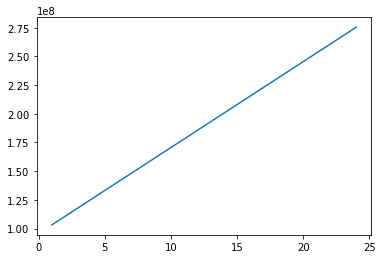

In [37]:
 plt.plot(x, y_trend)

In [38]:
avg_y_offset = [i / j for i, j in zip(y, y_trend)]

In [39]:
avg_y_offset_16 = avg_y_offset[0:12]

In [40]:
avg_y_offset_17 = avg_y_offset[12:24]

In [41]:
monthly_avg_y_offset = [(i + j) / 2 for i, j in zip(avg_y_offset_16, avg_y_offset_17)]

In [42]:
monthly_avg_y_offset

[1.0532816057748584,
 0.8820460945333423,
 1.0284072492951304,
 0.9905435197798473,
 1.0026630500471225,
 0.8848682819469573,
 0.873268023392495,
 0.9288212467289789,
 0.9147655488761955,
 1.0736836323317247,
 1.1915620100541806,
 1.188056409197044]

In [43]:
avr_avr = sum(monthly_avg_y_offset) / 12

In [44]:
season_coef = monthly_avg_y_offset / avr_avr

In [45]:
season_coef

array([1.0522323 , 0.88116737, 1.02738272, 0.98955671, 1.00166417,
       0.88398675, 0.87239805, 0.92789593, 0.91385423, 1.072614  ,
       1.19037494, 1.18687283])

#### Прогноз на 2018

In [46]:
def predict(season_coef, months, b, a):
    result = []
    coef = season_coef 
    j = 0
    for i in range(26, 26 + months):
        y = i * b + a
        if j < 9:
            result.append([f'180{j+1}', int(y * coef[j])])
        else:
            result.append([f'18{j+1}', int(y * coef[j])])
        j += 1
    return result

In [47]:
pred = predict(season_coef, 12, b, a)

In [48]:
result = pd.DataFrame(pred, columns = ['ГГММ', 'Прогноз'])

In [49]:
# Данно
result['Факт'] = [256798898 ,232640416, 267994924, 262849522, 276933049, 251486085, 
                  250559778, 261724749, 276675505, 287647539, 363102609, 422386052]

In [50]:
result

,ГГММ,Прогноз,Факт
0,1801,305556515,256798898
1,1802,262480802,232640416
2,1803,313729939,267994924
3,1804,309590510,262849522
4,1805,320880531,276933049
5,1806,289803621,251486085
6,1807,292538367,250559778
7,1808,318097899,261724749
8,1809,320128620,276675505
9,1810,383776617,287647539


###  RFM-анализ

#### 1 - Определяем критерии для каждой буквы R, F, M

R - Days since last purchase, F - Frequency, M - Money

In [51]:
RFM_param = np.array([['60+', '1', '0-10'], 
                      ['30-60', '2-4', '10-20'], 
                      ['0-30', '5+', '20+']])

In [52]:
RFM_cat = pd.DataFrame(RFM_param, columns = ['R', 'F', 'M'])
RFM_cat.index += 1
RFM_cat

,R,F,M
1,60+,1,0-10
2,30-60,2-4,10-20
3,0-30,5+,20+


In [53]:
df.head(3)

,id_o,user_id,price,o_date,year,month
0,1234491,337544,539.0,2016-01-01,2016,1
1,1234494,171642,153.3,2016-01-01,2016,1
2,1234497,260596,55.3,2016-01-01,2016,1


In [54]:
zero_date = pd.to_datetime('2017-12-31')

In [73]:
df['last_purchase_date'] = df.groupby('user_id')['o_date'].transform(lambda x: x.max())
df['last_purchase'] = (zero_date - df['last_purchase_date']).dt.days
df['purchases'] = df.groupby(['user_id'])['id_o'].transform('count')
df['total_rubs'] = df.groupby(['user_id'])['price'].transform('sum').astype('int')

In [110]:
df.head(3)

,id_o,user_id,price,o_date,year,month,last_purchase_date,last_purchase,purchases,total_rubs,user_cat,group
0,1234491,337544,539.0,2016-01-01,2016,1,2016-03-11,660,2,2487,121,Lost
1,1234494,171642,153.3,2016-01-01,2016,1,2017-12-25,6,33,42671,333,VIP
2,1234497,260596,55.3,2016-01-01,2016,1,2017-08-02,151,12,8626,131,Lost


#### 2 - Для каждого пользователя получаем набор из 3 цифр

In [76]:
RFM_cat

,R,F,M
1,60+,1,0-10
2,30-60,2-4,10-20
3,0-30,5+,20+


In [77]:
def classify_user(last_purchase, purchases ,total_rubs):
    r = 1
    f = 1
    m = 1
    given = [last_purchase, purchases ,total_rubs]
    if given[0] <= 30 :
        r = 3
    elif 30 < given[0] & given[0] <= 60 :
        r = 2
    if given[1] >=5:
        f = 3
    elif 2 <= given[1] & given[1] < 5:
        f = 2     
    if given[2] >= 20000:
        m = 3
    elif 10000 <= given[2] & given[2] < 20000:
        m = 2
    
    result = f'{r}{f}{m}'
    return int(result)

In [78]:
df['user_cat'] = df.apply(lambda x: classify_user(x['last_purchase'], x['purchases'], x['total_rubs']),axis=1)

In [79]:
df.head(3)

,id_o,user_id,price,o_date,year,month,last_purchase_date,last_purchase,purchases,total_rubs,user_cat
0,1234491,337544,539.0,2016-01-01,2016,1,2016-03-11,660,2,2487,121
1,1234494,171642,153.3,2016-01-01,2016,1,2017-12-25,6,33,42671,333
2,1234497,260596,55.3,2016-01-01,2016,1,2017-08-02,151,12,8626,131


#### 3 - Вводим группировку, к примеру, 333 и 233 – это Vip, 1XX – это Lost

In [80]:
df['group'] = 'Regular'
df.loc[(df['user_cat'] == 333) | (df['user_cat'] == 233), 'group'] = 'VIP'
df.loc[(df['user_cat'] / 100) < 2, 'group'] = 'Lost'

In [111]:
df.tail(3)

,id_o,user_id,price,o_date,year,month,last_purchase_date,last_purchase,purchases,total_rubs,user_cat,group
2002801,6945527,1574166,804.3,2017-12-31,2017,12,2017-12-31,0,65,94007,333,VIP
2002802,6945528,5919156,5019.7,2017-12-31,2017,12,2017-12-31,0,1,5019,311,Regular
2002803,6945534,4801083,679.7,2017-12-31,2017,12,2017-12-31,0,4,2004,321,Regular


#### 4 - Для каждой группы, находим кол-во пользователей, кот. попали в них и % товарооборота, которое они сделали на эти 2 года

In [83]:
df.groupby('group')['user_id'].nunique()

group
Lost       807066
Regular    193337
VIP         14716
Name: user_id, dtype: int64

In [84]:
df.groupby('group')['total_rubs'].sum()

group
Lost        29255331876
Regular      2920198066
VIP        234179738623
Name: total_rubs, dtype: int64

#### 5 - Проверяем, что общее кол-во пользователей бьется с суммой кол-во пользователей по группам из п. 3 (если у вас есть логические ошибки в создании групп, у вас не собьются цифры). То же самое делаем и по деньгам

In [112]:
users_by_cat = df.groupby('user_cat')['user_id'].nunique().sum()
users_by_group = df.groupby('group')['user_id'].nunique().sum()
money_by_cat = df.groupby('user_cat')['total_rubs'].sum().sum()
money_by_group = df.groupby('group')['total_rubs'].sum().sum()

In [117]:
checking_list = [[users_by_cat, users_by_group, money_by_cat, money_by_group]]

In [120]:
checking_tbl = pd.DataFrame(checking_list, columns = ['Users_by_cat', 'Users_by_group',
                                                      'Money_by_cat', 'Money_by_group'])
checking_tbl

,Users_by_cat,Users_by_group,Money_by_cat,Money_by_group
0,1015119,1015119,266355268565,266355268565
